In [18]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import DataStructs

In [2]:
from collections import OrderedDict

##Using dummy atomic numbers 40 - 44 to correspond to D,A,P,N,L

PPP = OrderedDict({"D":(['[OH]','[#7H,#7H2]'], 40),
      "A":(['[O]','[#7H0]'], 41),
      'P':(['[*+]','[#7H2]'], 42),
      'N':(['[*-]','[C&$(C(=O)O)]','[P&$(P(=O)O)]','[S&$(S(=O)O)]'], 43),
      "L":(['[Cl,Br,I]','[S;D2;$(S(C)(C))]'], 44)})

In [3]:
##This sets the "L" type

def ContructLFromGraphSearch(mol):
    AtomIndex = []
    for atom in mol.GetAtoms():
        temp = []
        if atom.GetAtomicNum() == 6:
            for neighatom in atom.GetNeighbors():
                if neighatom.GetAtomicNum() == 6:
                    temp.append(0)
                elif neighatom.GetAtomicNum() == 1:
                    continue
                else:
                    temp.append(1)
            if sum(temp) == 0:
                AtomIndex.append(atom.GetIdx())

    return AtomIndex

In [4]:
##This sets the DAPN types. 

def AssignAtomType(mol):
    res = dict()
    for ppptype in PPP:
        temp = []
        for i in PPP[ppptype][0]:
            patt = Chem.MolFromSmarts(i)
            atomindex = mol.GetSubstructMatches(patt)
            atomindex = [k[0] for k in atomindex]
            temp.extend(atomindex)
            for atom in atomindex:
                mol.GetAtomWithIdx(atom).SetAtomicNum(PPP[ppptype][1])
        res.update({ppptype:temp})
    temp = ContructLFromGraphSearch(mol)
    temp.extend(res['L'])
    res.update({'L':temp})
    for idx in res['L']:
        mol.GetAtomWithIdx(idx).SetAtomicNum(44)
        
    #print(res)
    return mol

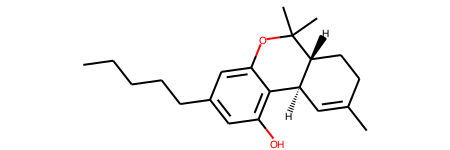

In [39]:
thc = 'CCCCCc1cc(c2c(c1)OC([C@H]3[C@H]2C=C(CC3)C)(C)C)O'

thc_mol = Chem.MolFromSmiles(thc)

thc_mol

RDKit ERROR: [14:39:20] Can't kekulize mol.  Unkekulized atoms: 7 9
RDKit ERROR: 


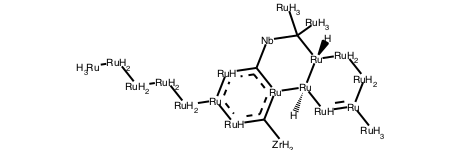

In [38]:
thc_mol_CATS = AssignAtomType(Chem.MolFromSmiles(thc))


thc_mol_CATS